In [1]:
from keras import backend as k
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD,RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#define the ConvNet
class LeNetv1:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # CONV => RELU => CONV => RELU 
        model.add(Conv2D(70, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(Conv2D(70, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # FLATTEN => RELU LAYERS
        model.add(Flatten())
        model.add(Dense(500)) #dense network of 500 neurons 
        model.add(Activation("relu"))
        # SOFTMAX CLASSIFIER
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [3]:
# NETWORK & TRAINING
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28 #INPUT IMAGE DIMENSIONS
NB_CLASSES = 10 # NUMBER OF OUTPUTS = NUMBER OF DIGITS
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
# DATA SHUFFLED AND SPLIT BETWEEN TRAIN AND TEST SETS
(X_train, y_train), (X_test, y_test) = mnist.load_data()
k.set_image_dim_ordering("th")
# CONSIDER THE AS FLOAT AND NORMALIZE
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# WE NEED A 60K x [1 x 28 x 28] SHAPE AS INPUT TO THE CONVNET 
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# CONVERT CLASS VECTORS TO BINARY CLASS MATRICES
y_train = np_utils.to_categorical(y_train, NB_CLASSES) 
y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# INITIALIZE THE OPTIMIZER AND MODEL 
model = LeNetv1.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
# LIST ALL DATA IN HISTORY
print(history.history.keys())

60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 7s 151us/step - loss: 0.2126 - acc: 0.9334 - val_loss: 0.0668 - val_acc: 0.9799
Epoch 2/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0512 - acc: 0.9838 - val_loss: 0.0694 - val_acc: 0.9782
Epoch 3/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0374 - val_acc: 0.9893
Epoch 4/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0275 - acc: 0.9913 - val_loss: 0.0355 - val_acc: 0.9898
Epoch 5/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0203 - acc: 0.9935 - val_loss: 0.0321 - val_acc: 0.9916
Epoch 6/20
48000/48000 [==============================] - 6s 116us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0352 - val_acc: 0.9907
Epoch 7/20
48000/48000 [==============================] - 6s 117us/step - loss: 0.0

<function matplotlib.pyplot.show(*args, **kw)>

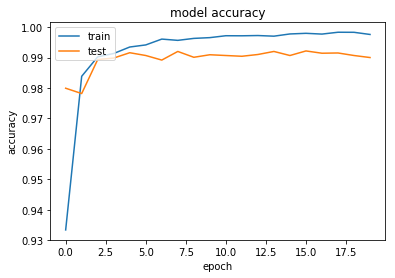

In [4]:
# SUMMARIZE HISTORY FOR ACCURACY
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

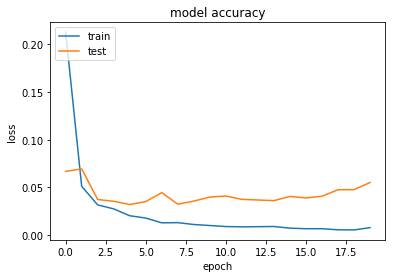

In [5]:
# SUMMARIZE HISTORY FOR LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show